In [2]:
#   Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor, plot_importance

In [4]:
#  Load Data
df = pd.read_csv('cleaned_sales.csv', parse_dates=['date'])

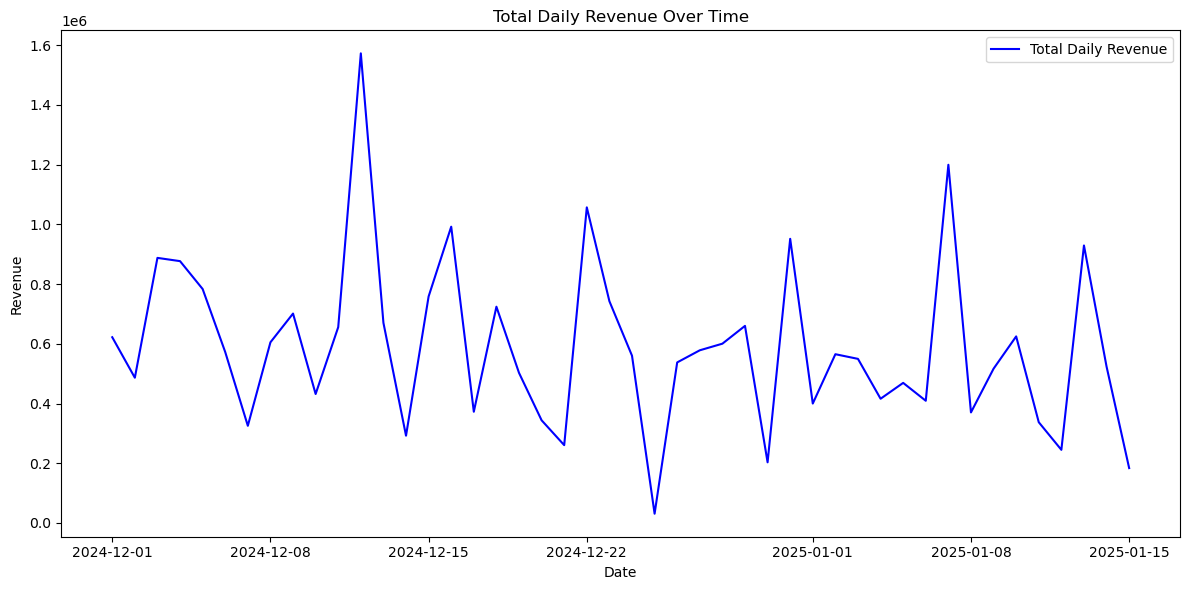

In [6]:
#  Line Chart – Daily Total Revenue Over Time 
daily_revenue = df.groupby('date')['revenue'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(daily_revenue['date'], daily_revenue['revenue'], color='blue', label='Total Daily Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Total Daily Revenue Over Time')
plt.legend()
plt.tight_layout()
plt.show()


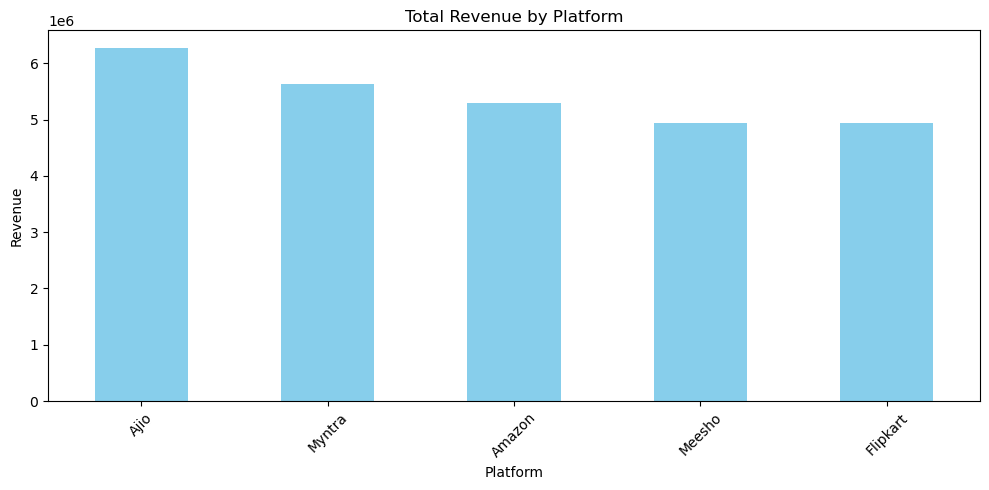

In [8]:
#   Bar Chart – Total Revenue by Platform
platform_revenue = df.groupby('platform')['revenue'].sum().sort_values(ascending=False)
platform_revenue.plot(kind='bar', figsize=(10, 5), color='skyblue', title='Total Revenue by Platform')
plt.ylabel('Revenue')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


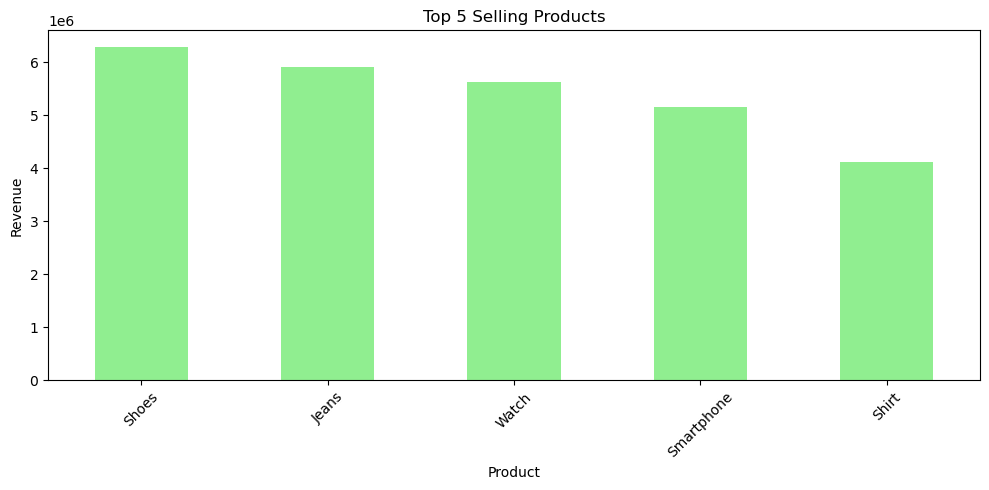

In [10]:
#   Bar Chart – Top 10 Products by Revenue
top_products = df.groupby('product_name')['revenue'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(10, 5), color='lightgreen', title='Top 5 Selling Products')
plt.ylabel('Revenue')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

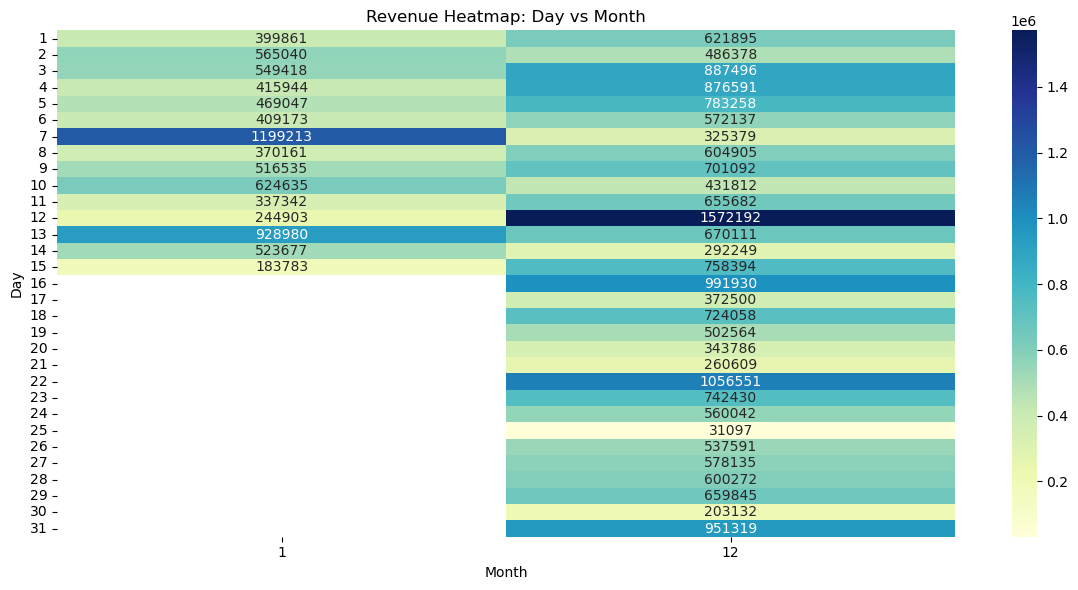

In [12]:
#   Heatmap – Revenue Across Day and Month
df['day'] = df['date'].dt.day
sales_heatmap = df.pivot_table(values='revenue', index='day', columns='month', aggfunc='sum')
plt.figure(figsize=(12, 6))
sns.heatmap(sales_heatmap, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Revenue Heatmap: Day vs Month')
plt.xlabel('Month')
plt.ylabel('Day')
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

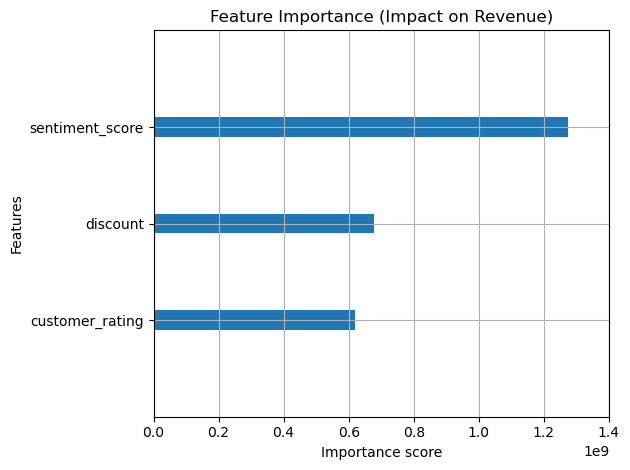

In [14]:
#   Feature Importance – Impact on Revenue (XGBoost)
features = ['discount', 'customer_rating', 'sentiment_score']
X = df[features]
y = df['revenue']
xgb_model = XGBRegressor()
xgb_model.fit(X, y)

plt.figure(figsize=(8, 6))
plot_importance(xgb_model, importance_type='gain', show_values=False)
plt.title('Feature Importance (Impact on Revenue)')
plt.tight_layout()
plt.show()